In [6]:
import mlflow
import pandas as pd

# Setze das Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Hole die Runs aus einem Experiment
experiment_name = "Bitcoin Price Movement Prediction LSTM v2"
experiment = mlflow.get_experiment_by_name(experiment_name)
experiment_id = experiment.experiment_id

# Lade die Runs
client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_id)

# Konvertiere die Runs in ein DataFrame
runs_df = pd.DataFrame([run.data.metrics for run in runs])
params_df = pd.DataFrame([run.data.params for run in runs])
metrics_df = runs_df.join(params_df)

# Konvertiere relevante Spalten zu numerischen Werten
metrics_df['learning_rate'] = metrics_df['learning_rate'].astype(float)
metrics_df['epochs'] = metrics_df['epochs'].astype(int)
metrics_df['seq_length'] = metrics_df['seq_length'].astype(int)
metrics_df['batch_size'] = metrics_df['batch_size'].astype(int)
metrics_df['accuracy'] = metrics_df['accuracy'].astype(float)

# Überprüfe die Daten
metrics_df.head()


,loss,accuracy,learning_rate,epochs,batch_size,seq_length
0,0.693052,0.513043,0.001,50,32,60
1,0.694206,0.497110,0.001,50,32,50
2,0.694055,0.498559,0.001,50,32,40
3,0.694764,0.511494,0.001,50,32,30
4,0.693148,0.513043,0.001,40,32,60


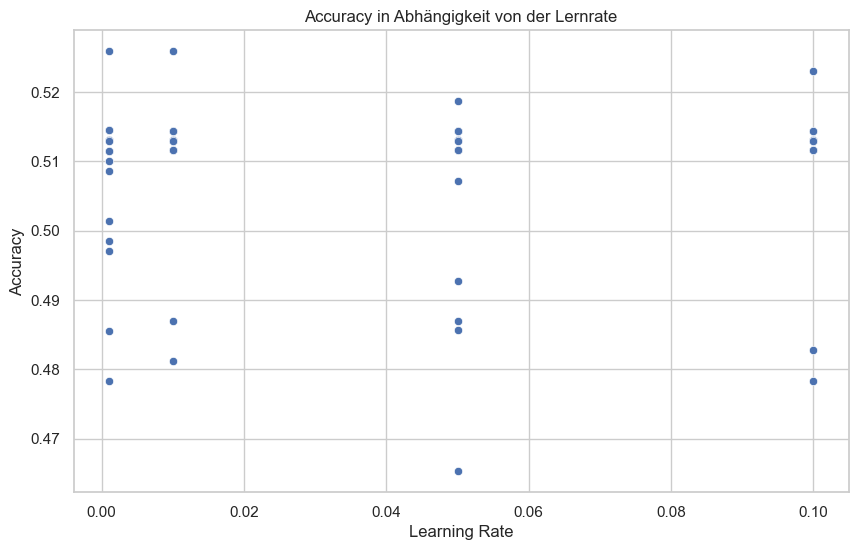

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Erstelle einen Scatterplot für die Lernrate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='learning_rate', y='accuracy', data=metrics_df)
plt.title('Accuracy in Abhängigkeit von der Lernrate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


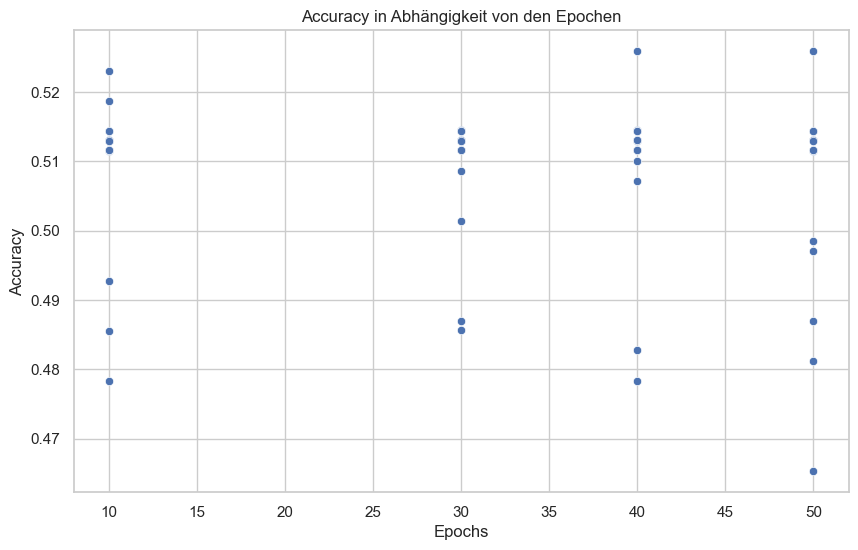

In [8]:
# Erstelle einen Scatterplot für die Epochen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='epochs', y='accuracy', data=metrics_df)
plt.title('Accuracy in Abhängigkeit von den Epochen')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


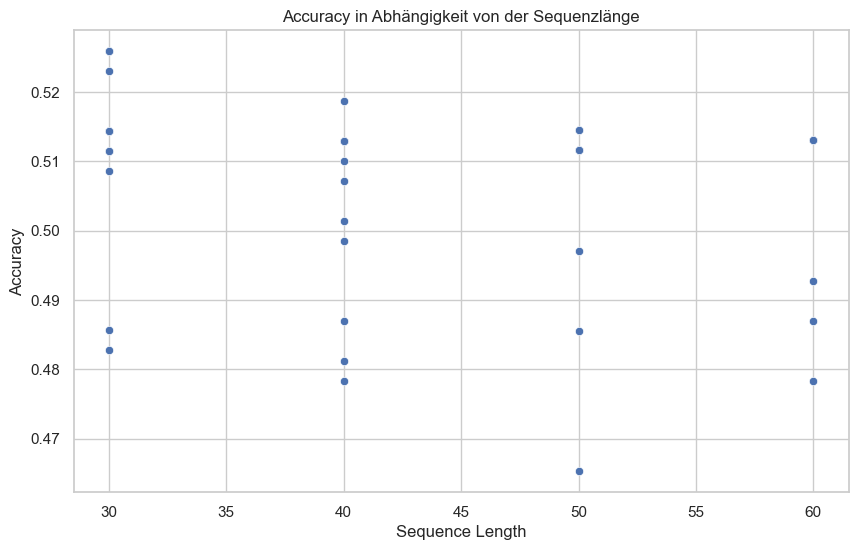

In [9]:
# Erstelle einen Scatterplot für die Sequenzlänge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seq_length', y='accuracy', data=metrics_df)
plt.title('Accuracy in Abhängigkeit von der Sequenzlänge')
plt.xlabel('Sequence Length')
plt.ylabel('Accuracy')
plt.show()


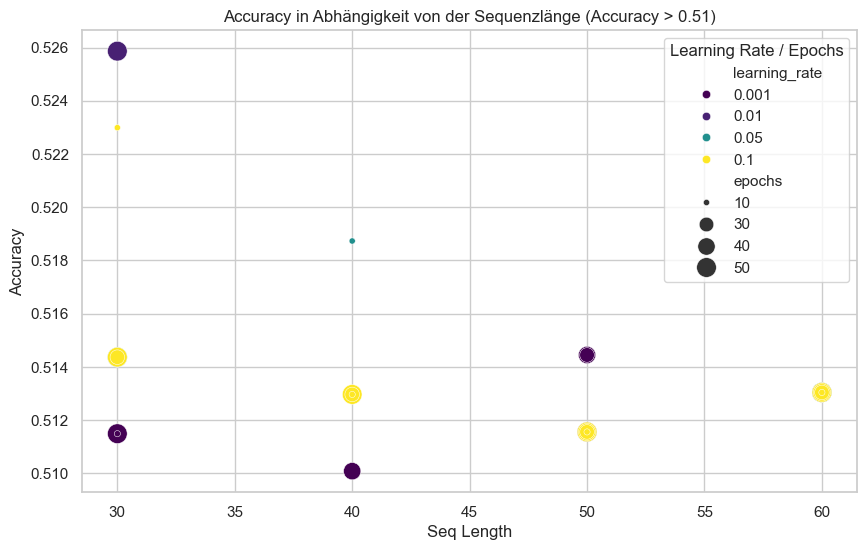

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtere Modelle mit einer Accuracy von mehr als 0.51
filtered_df = metrics_df[metrics_df['accuracy'] > 0.51]

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Erstelle einen Scatterplot für die Sequenzlänge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seq_length', y='accuracy', hue='learning_rate', size='epochs', data=filtered_df, palette='viridis', sizes=(20, 200))
plt.title('Accuracy in Abhängigkeit von der Sequenzlänge (Accuracy > 0.51)')
plt.xlabel('Seq Length')
plt.ylabel('Accuracy')
plt.legend(loc='best', title='Learning Rate / Epochs')
plt.show()

In [17]:
# Lade die Runs
client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_id)

# Konvertiere die Runs in ein DataFrame
runs_df = pd.DataFrame([run.data.metrics for run in runs])
params_df = pd.DataFrame([run.data.params for run in runs])
metrics_df = runs_df.join(params_df)

# Konvertiere relevante Spalten zu numerischen Werten
metrics_df['learning_rate'] = metrics_df['learning_rate'].astype(float)
metrics_df['epochs'] = metrics_df['epochs'].astype(int)
metrics_df['seq_length'] = metrics_df['seq_length'].astype(int)
metrics_df['batch_size'] = metrics_df['batch_size'].astype(int)
metrics_df['accuracy'] = metrics_df['accuracy'].astype(float)

# Filtere Modelle mit einer Accuracy von mehr als 0.51
filtered_df = metrics_df[metrics_df['accuracy'] > 0.51]

# Wähle die Top 5 Modelle basierend auf Accuracy
top_5_df = filtered_df.nlargest(5, 'accuracy')


,loss,accuracy,learning_rate,epochs,batch_size,seq_length
7,0.693268,0.525862,0.001,40,32,30
19,0.697176,0.525862,0.010,50,32,30
63,0.690926,0.522988,0.100,10,32,30
46,0.697759,0.518732,0.050,10,32,40
5,0.693851,0.514451,0.001,40,32,50


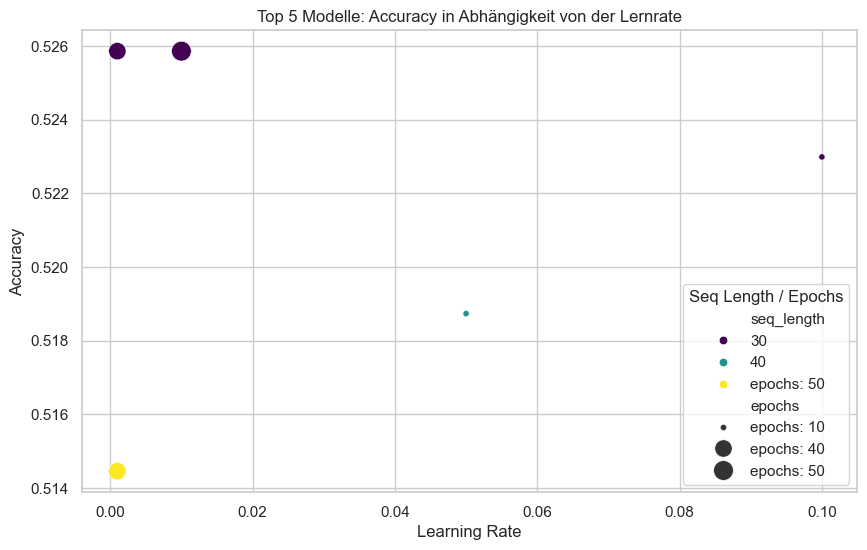

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Erstelle einen Scatterplot für die Lernrate mit den Top-5-Modellen
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='learning_rate', y='accuracy', hue='seq_length', size='epochs', data=top_5_df, palette='viridis', sizes=(20, 200))
plt.title('Top 5 Modelle: Accuracy in Abhängigkeit von der Lernrate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

# Passe die Legende an, um die Anzahl der Epochen besser zu erkennen
handles, labels = scatter.get_legend_handles_labels()

# Extrahiere die spezifischen Handles und Labels für 'seq_length' und 'epochs'
seq_length_handles = handles[:len(top_5_df['seq_length'].unique())]
seq_length_labels = labels[:len(top_5_df['seq_length'].unique())]

epochs_handles = handles[len(top_5_df['seq_length'].unique()):]
epochs_labels = labels[len(top_5_df['seq_length'].unique()):]

# Formatiere die Epochs-Labels korrekt
new_epochs_labels = []
for label in epochs_labels:
    try:
        new_label = f'epochs: {int(float(label))}'
        new_epochs_labels.append(new_label)
    except ValueError:
        new_epochs_labels.append(label)

# Erstelle eine neue Legende mit den angepassten Labels und füge sie dem Plot hinzu
plt.legend(seq_length_handles + epochs_handles, seq_length_labels + new_epochs_labels, title='Seq Length / Epochs', loc='best')
plt.show()
